In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

import warnings
warnings. filterwarnings('ignore')


In [3]:
df = pd.read_csv('heart_disease.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [15]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
print('0/1 : ' , 500/768 , '\n1/0' , 268/768)

0/1 :  0.6510416666666666 
1/0 0.3489583333333333


# data visualization

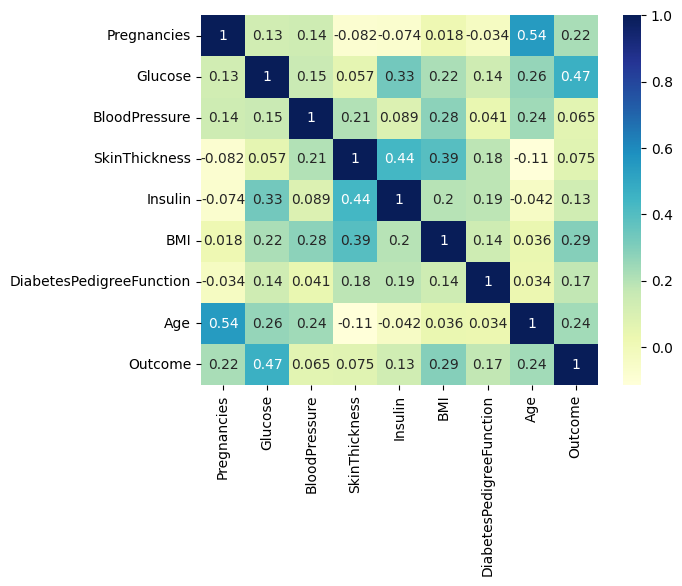

In [24]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [10]:


# Create a count plot 
def scatterPlot( df1 , df2 , x , y):
    plt.figure(figsize=(8, 6))


   
    plt.scatter(df1[x] , df1[y] , color = 'green' , marker = '+')
    plt.scatter(df2[x] , df2[y] , color = 'red' , marker = '_')

    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

1. Age and Pregnancy

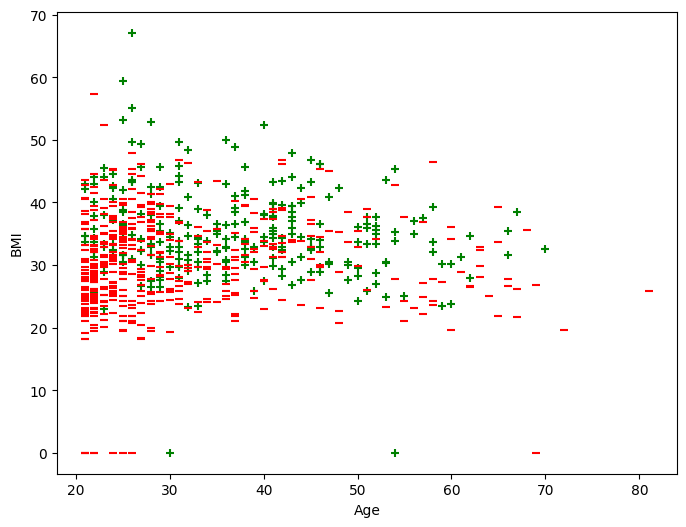

In [11]:
df1 = df[df['Outcome'] == 1]
df2 = df[df['Outcome'] == 0]


scatterPlot(df1,df2,'Age' , 'BMI')


# Data Preprocessing

In [27]:
features = df.drop('Outcome' , axis=1)
target = df['Outcome']

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, stratify=target, random_state=10)

In [43]:
print(y_train.value_counts())
print( 375/576 , 201/576)



Outcome
0    375
1    201
Name: count, dtype: int64
0.6510416666666666 0.3489583333333333


In [44]:
print(y_test.value_counts())
print( 125/192 , 67/192)

Outcome
0    125
1     67
Name: count, dtype: int64
0.6510416666666666 0.3489583333333333


# Train using stand alone model

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), feature_scaled , target, cv=5)
scores.mean()

0.7097699685934981

# Train using Bagging

In [47]:
from sklearn.ensemble import  BaggingClassifier



In [51]:
bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier() ,
    n_estimators = 100 , 
    max_samples  = 0.8 , 
    oob_score = True ,
    random_state = 0 

)
bag_model

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [52]:
scores = cross_val_score(bag_model, feature_scaled, target, cv=5)
scores.mean()

0.7591800356506239

In [54]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), feature_scaled, target,  cv=5)
scores.mean()

0.7682794329853154